<h1><center>Analyzing the Most Feared Champions in League of Legends</center></h1>
<h3><center>Matthew Goulding and Daniel Evans</center></h3>

![title](https://ekgaming.com/wp-content/uploads/2018/04/Lol-Champions.jpg)

Each game of League of Legends starts with each team banning 5 champions before picking the 5 champions they will play. The banned champions cannot be picked for the game. There are 142 champions in the game with a large range of abilities and play styles. Roughly, the champions balance out to around a 50% win rate. Despite this, some champions are considered less fun to play against, so this report will try to determine who those champions are and why they are feard.

My hypothesis is that crowd control abilities will be a common theme amongst hated champions. Crowd control abilities limit the movements and actions that you can take in game. They result in the player not being able to play the game for a second which can make all the difference in the fast paced team fights. To me, it would make sense that these abilities are the least fun to play against because they limit the players ability to impact the game.

To start off, we will need data about each champions abilities. To do this, we can use the Riot Games [Static Data API](https://developer.riotgames.com/static-data.html). This API contains the champion data used by the League of Legends client, and has a JSON file for every champion in every patch. As of the writing of this tutorial, the latest patch is 8.24, so we will be using this to get our data. I have created an array with all the champions in the game as of now, and loop through it to get the JSON file containing the data for each champion, via a GET request to the Riot Games Static Data API. I then combine the data for each champion in a Pandas DataFrame object.

In [1]:
import requests
import pandas as pd
import seaborn as sns

champions = ["Aatrox","Ahri","Akali","Alistar","Amumu","Anivia","Annie","Ashe","AurelionSol","Azir","Bard","Blitzcrank","Brand",
"Braum","Caitlyn","Camille","Cassiopeia","Chogath","Corki","Darius","Diana","DrMundo","Draven","Ekko","Elise","Evelynn",
"Ezreal","Fiddlesticks","Fiora","Fizz","Galio","Gangplank","Garen","Gnar","Gragas","Graves","Hecarim","Heimerdinger",
"Illaoi","Irelia","Ivern","Janna","JarvanIV","Jax","Jayce","Jhin","Jinx","Kaisa","Kalista","Karma","Karthus","Kassadin",
"Katarina","Kayle","Kayn","Kennen","Khazix","Kindred","Kled","KogMaw","Leblanc","LeeSin","Leona","Lissandra","Lucian","Lulu",
"Lux","Malphite","Malzahar","Maokai","MasterYi","MissFortune","Mordekaiser","Morgana","Nami","Nasus","Nautilus","Neeko",
"Nidalee","Nocturne","Nunu","Olaf","Orianna","Ornn","Pantheon","Poppy","Pyke","Quinn","Rakan","Rammus","RekSai","Renekton",
"Rengar","Riven","Rumble","Ryze","Sejuani","Shaco","Shen","Shyvana","Singed","Sion","Sivir","Skarner","Sona","Soraka","Swain",
"Syndra","TahmKench","Taliyah","Talon","Taric","Teemo","Thresh","Tristana","Trundle","Tryndamere","TwistedFate","Twitch",
"Udyr","Urgot","Varus","Vayne","Veigar","Velkoz","Vi","Viktor","Vladimir","Volibear","Warwick","MonkeyKing","Xayah","Xerath",
"XinZhao","Yasuo","Yorick","Zac","Zed","Ziggs","Zilean","Zoe","Zyra" ]

ChampionsData = pd.DataFrame()
for champion in champions:
    url = "https://ddragon.leagueoflegends.com/cdn/8.24.1/data/en_US/champion/" + champion + ".json"
    r = requests.get(url)
    x = pd.DataFrame(r.json()['data']).T
    ChampionsData = ChampionsData.append(x)

ChampionsData.head()

,allytips,blurb,enemytips,id,image,info,key,lore,name,partype,passive,recommended,skins,spells,stats,tags,title
Aatrox,[Use Umbral Dash while casting The Darkin Blad...,Once honored defenders of Shurima against the ...,"[Aatrox's attacks are very telegraphed, so use...",Aatrox,"{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...",266,Once honored defenders of Shurima against the ...,Aatrox,Blood Well,"{'name': 'Deathbringer Stance', 'description':...","[{'champion': 'Aatrox', 'title': 'AatroxARAM',...","[{'id': '266000', 'num': 0, 'name': 'default',...","[{'id': 'AatroxQ', 'name': 'The Darkin Blade',...","{'hp': 580, 'hpperlevel': 80, 'mp': 0, 'mpperl...","[Fighter, Tank]",the Darkin Blade
Ahri,"[Use Charm to set up your combos, it will make...",Innately connected to the latent power of Rune...,[Ahri's survivability is dramatically reduced ...,Ahri,"{'full': 'Ahri.png', 'sprite': 'champion0.png'...","{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...",103,Innately connected to the latent power of Rune...,Ahri,Mana,"{'name': 'Vastayan Grace', 'description': 'Whe...","[{'champion': 'Ahri', 'title': 'AhriARAM', 'ma...","[{'id': '103000', 'num': 0, 'name': 'default',...","[{'id': 'AhriOrbofDeception', 'name': 'Orb of ...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","[Mage, Assassin]",the Nine-Tailed Fox
Akali,[Akali excels at killing fragile champions. Le...,Abandoning the Kinkou Order and her title of t...,[Akali can still be hit by area effect spells ...,Akali,"{'full': 'Akali.png', 'sprite': 'champion0.png...","{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...",84,Abandoning the Kinkou Order and her title of t...,Akali,Energy,"{'name': 'Assassin's Mark', 'description': 'De...","[{'champion': 'Akali', 'title': 'AkaliARAM', '...","[{'id': '84000', 'num': 0, 'name': 'default', ...","[{'id': 'AkaliQ', 'name': 'Five Point Strike',...","{'hp': 550, 'hpperlevel': 85, 'mp': 200, 'mppe...",[Assassin],the Rogue Assassin
Alistar,[Using Pulverize can allow you to establish be...,Always a mighty warrior with a fearsome reputa...,[Alistar is very disruptive but very tough - t...,Alistar,"{'full': 'Alistar.png', 'sprite': 'champion0.p...","{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...",12,Always a mighty warrior with a fearsome reputa...,Alistar,Mana,"{'name': 'Triumphant Roar', 'description': 'Al...","[{'champion': 'Alistar', 'title': 'AlistarARAM...","[{'id': '12000', 'num': 0, 'name': 'default', ...","[{'id': 'Pulverize', 'name': 'Pulverize', 'des...","{'hp': 573.36, 'hpperlevel': 106, 'mp': 278.84...","[Tank, Support]",the Minotaur
Amumu,"[Amumu is highly dependent on teammates, so tr...",Legend claims that Amumu is a lonely and melan...,[Avoid bunching up with other allies when Amum...,Amumu,"{'full': 'Amumu.png', 'sprite': 'champion0.png...","{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...",32,Legend claims that Amumu is a lonely and melan...,Amumu,Mana,"{'name': 'Cursed Touch', 'description': 'Amumu...","[{'champion': 'Amumu', 'title': 'AmumuARAM', '...","[{'id': '32000', 'num': 0, 'name': 'default', ...","[{'id': 'BandageToss', 'name': 'Bandage Toss',...","{'hp': 613.12, 'hpperlevel': 84, 'mp': 287.2, ...","[Tank, Mage]",the Sad Mummy


Next, we want to clean up this table so it is easier to work with. 

The JSON files provided by the Riot Games Static Data API have a lot of data that we don't need, so I start by dropping the unnecessary columns.
Next, we will be needing the data for each ability, but those are currently all mashed together in a single column of the table, so I use the apply() method with a lambda function to map each ability from the spells column to a new column of the table. Afterwards, I delete the spells column, because it is now redundant. 

In [2]:
ChampionsData.set_index('key')
ChampionsData = ChampionsData.drop(columns=['allytips', 'blurb', 'enemytips','id','image','partype','recommended','skins','title'])
ChampionsData['Q'] = ChampionsData.apply(lambda row: row['spells'][0], axis = 1)
ChampionsData['W'] = ChampionsData.apply(lambda row: row['spells'][1], axis = 1)
ChampionsData['E'] = ChampionsData.apply(lambda row: row['spells'][2], axis = 1)
ChampionsData['R'] = ChampionsData.apply(lambda row: row['spells'][3], axis = 1)

ChampionsData = ChampionsData.drop(columns=['spells'])
ChampionsData.head(5)

,info,key,lore,name,passive,stats,tags,Q,W,E,R
Aatrox,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...",266,Once honored defenders of Shurima against the ...,Aatrox,"{'name': 'Deathbringer Stance', 'description':...","{'hp': 580, 'hpperlevel': 80, 'mp': 0, 'mpperl...","[Fighter, Tank]","{'id': 'AatroxQ', 'name': 'The Darkin Blade', ...","{'id': 'AatroxW', 'name': 'Infernal Chains', '...","{'id': 'AatroxE', 'name': 'Umbral Dash', 'desc...","{'id': 'AatroxR', 'name': 'World Ender', 'desc..."
Ahri,"{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...",103,Innately connected to the latent power of Rune...,Ahri,"{'name': 'Vastayan Grace', 'description': 'Whe...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","[Mage, Assassin]","{'id': 'AhriOrbofDeception', 'name': 'Orb of D...","{'id': 'AhriFoxFire', 'name': 'Fox-Fire', 'des...","{'id': 'AhriSeduce', 'name': 'Charm', 'descrip...","{'id': 'AhriTumble', 'name': 'Spirit Rush', 'd..."
Akali,"{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...",84,Abandoning the Kinkou Order and her title of t...,Akali,"{'name': 'Assassin's Mark', 'description': 'De...","{'hp': 550, 'hpperlevel': 85, 'mp': 200, 'mppe...",[Assassin],"{'id': 'AkaliQ', 'name': 'Five Point Strike', ...","{'id': 'AkaliW', 'name': 'Twilight Shroud', 'd...","{'id': 'AkaliE', 'name': 'Shuriken Flip', 'des...","{'id': 'AkaliR', 'name': 'Perfect Execution', ..."
Alistar,"{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...",12,Always a mighty warrior with a fearsome reputa...,Alistar,"{'name': 'Triumphant Roar', 'description': 'Al...","{'hp': 573.36, 'hpperlevel': 106, 'mp': 278.84...","[Tank, Support]","{'id': 'Pulverize', 'name': 'Pulverize', 'desc...","{'id': 'Headbutt', 'name': 'Headbutt', 'descri...","{'id': 'AlistarE', 'name': 'Trample', 'descrip...","{'id': 'FerociousHowl', 'name': 'Unbreakable W..."
Amumu,"{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...",32,Legend claims that Amumu is a lonely and melan...,Amumu,"{'name': 'Cursed Touch', 'description': 'Amumu...","{'hp': 613.12, 'hpperlevel': 84, 'mp': 287.2, ...","[Tank, Mage]","{'id': 'BandageToss', 'name': 'Bandage Toss', ...","{'id': 'AuraofDespair', 'name': 'Despair', 'de...","{'id': 'Tantrum', 'name': 'Tantrum', 'descript...","{'id': 'CurseoftheSadMummy', 'name': 'Curse of..."


Now, I want to test my hypothesis that champions with high amount of crowd control are more likely to be banned. To do this, I calculate a "CC Score" for every champion. This score is calculated by scanning the tooltips for each ability of each champion, looking for keywords that relate to crowd-control. I use the following point values to calculate the score, with higher points representing stronger effects:

  Keyword  | Points
  ---------| -------------
  Supress  | 3
  Knock    | 3
  Stun     | 2.5
  Charm    | 2.5
  Snare    | 2
  Entangle | 2
  Taunt    | 1.5
  Pull     | 1.5
  Slow     | 1
  Silence  | 0.5
  
We only count the highest point keyword per ability, so an ability that both slows and knocks up will only get 3 points. Note that this score merely serves as a vague estimate. There are many inaccuracies as we can't know how difficult it is to perform the crowd control, the cost, or the number of champions it can affect at once. We only check that the ability has the capability of performing this crowd control. 


In [3]:
def getCCScore(champion):
    result = 0
    if('supress' in champion.loc['passive']['description']):
        result+=3
    elif('knock' in champion.loc['passive']['description']):
        result+=3
    elif('stun' in champion.loc['passive']['description'] or 'charm' in champion.loc['passive']['description'] ):
        result+=2.5
    elif('snare' in champion.loc['passive']['description'] or 'entangle' in champion.loc['passive']['description']):
        result+=2
    elif('taunt' in champion.loc['passive']['description'] or 'pull' in champion.loc['passive']['description']):
        result+=1.5
    elif('slow' in champion.loc['passive']['description']):
        result+=1
    elif('silence' in champion.loc['passive']['description']):
        result+=.5
    for ability in ['Q', 'W', 'E', 'R']:
        if('supress' in champion.loc[ability]['tooltip']):
            result+=3
        elif('knock' in champion.loc[ability]['tooltip']):
            result+=3
        elif('stun' in champion.loc[ability]['tooltip'] or 'charm' in champion.loc[ability]['tooltip'] ):
            result+=2.5
        elif('snare' in champion.loc[ability]['tooltip'] or 'entangle' in champion.loc[ability]['tooltip']):
            result+=2
        elif('taunt' in champion.loc[ability]['tooltip'] or 'pull' in champion.loc[ability]['tooltip']):
            result+=1.5
        elif('slow' in champion.loc[ability]['tooltip']):
            result+=1
        elif('silence' in champion.loc[ability]['tooltip']):
            result+=.5
    return result

ChampionsData['CC Score'] = ChampionsData.apply(lambda row: getCCScore(row), axis = 1)
ChampionsData['key'] = pd.to_numeric(ChampionsData['key'])
ChampionsData[['name','CC Score']].head(10)

,name,CC Score
Aatrox,Aatrox,4.0
Ahri,Ahri,2.5
Akali,Akali,3.5
Alistar,Alistar,8.0
Amumu,Amumu,4.5
Anivia,Anivia,6.0
Annie,Annie,2.5
Ashe,Ashe,3.5
AurelionSol,Aurelion Sol,5.5
Azir,Azir,4.0


Now we will start looking at some match data. We can get this by performing a GET request on champion.gg's API. First we will get the data and save it to a DataFrame called rates. 

In [4]:
r = requests.get('http://api.champion.gg/v2/champions?elo=GOLD&champData=winRate&limit=2000&api_key=aa2c48dbf711614fb6f00dc2827b119a')
x = r.json()
rates = pd.DataFrame(x).sort_values(by=['championId'])
rates.head()

,_id,banRate,championId,elo,gamesPlayed,patch,percentRolePlayed,playRate,role,winRate
179,"{'championId': 1, 'role': 'DUO_SUPPORT'}",0.001170,1,GOLD,1993,8.24,0.255775,0.005045,DUO_SUPPORT,0.493226
137,"{'championId': 1, 'role': 'MIDDLE'}",0.001170,1,GOLD,4007,8.24,0.514245,0.010144,MIDDLE,0.514599
184,"{'championId': 2, 'role': 'TOP'}",0.000420,2,GOLD,1877,8.24,0.311122,0.004752,TOP,0.464038
148,"{'championId': 2, 'role': 'JUNGLE'}",0.000420,2,GOLD,3410,8.24,0.565225,0.008632,JUNGLE,0.488270
100,"{'championId': 3, 'role': 'MIDDLE'}",0.001465,3,GOLD,7122,8.24,0.552136,0.018029,MIDDLE,0.514041


Now I want to collect the winrate, banrate, and playrate for each champion. Since champion.gg stores separate data for each role (top, jungle, middle, bottom, and support) for each champion, I do a groupby to merge the data into something I can join with the ChampionsData table, which has 1 row for each champion. For winrate, it makes sense to take the average of the roles winrates. For playrate, I took the sum for the groupby to get the total playrate across all roles. Banrate is independent of role, so it is the same value for every role.
* Winrate is the percentage of games that that champion wins when it gets picked
* Playrate is the percentage of games that a champion gets picked in out of the total number of games that they could possibly be picked in.
* Banrate is the pers

In [5]:
winrates = rates.groupby(['championId'])['winRate'].mean().to_frame()
playrates = rates.groupby(['championId'])['playRate'].sum().to_frame()
banrates = rates.groupby(['championId'])['banRate'].max().to_frame()

I can now merge ChampionsData with these tables to add a winRate, playRate, and banRate column for each champion.

In [6]:
ChampionsData['key'] = ChampionsData['key'].astype(int)
ChampionsData = ChampionsData.set_index('key')

ChampionsData = ChampionsData.merge(banrates, left_index=True, right_index=True, how='left')
ChampionsData = ChampionsData.merge(winrates, left_index=True, right_index=True, how='left')
ChampionsData = ChampionsData.merge(playrates, left_index=True, right_index=True, how='left')

ChampionsData[['name','CC Score','winRate','playRate','banRate']].head(10)

,name,CC Score,winRate,playRate,banRate
key,,,,,
266,Aatrox,4.0,0.479462,0.048104,0.029284
103,Ahri,2.5,0.525860,0.047380,0.006514
84,Akali,3.5,0.436891,0.047091,0.054260
12,Alistar,8.0,0.489915,0.051832,0.009477
32,Amumu,4.5,0.523371,0.025834,0.000788
34,Anivia,6.0,0.515717,0.014349,0.001111
1,Annie,2.5,0.503913,0.015189,0.001170
22,Ashe,3.5,0.522925,0.035557,0.000493
136,Aurelion Sol,5.5,0.482597,0.004873,0.000533


Each champion has a classification which determines their playstyle:
* Assassins are mobile and do large amounts of damage usually with short range.
* Fighters are a split between damage and survivability with short range.
* Mages are long range and do large amounts of damage with abilities.
* Marksmen are ranged champions that get stronger over time.
* Supports are capable of protecting teammates through shields and healing.
* Tanks are very durable and often have crowd control abilities.

Because they vary in style, I decided to split them into their own groups to see if their classification affects banrate.

In [7]:
#Makes a primary role column from the first element of the array in the 'tags' column
ChampionsData['primaryRole'] = ''
for k,row in ChampionsData.iterrows():
    row['primaryRole'] = row['tags'][0]
    ChampionsData.loc[k] = row
ChampionsData[['name','primaryRole','winRate','playRate','banRate']].head(10)


,name,primaryRole,winRate,playRate,banRate
key,,,,,
266,Aatrox,Fighter,0.479462,0.048104,0.029284
103,Ahri,Mage,0.525860,0.047380,0.006514
84,Akali,Assassin,0.436891,0.047091,0.054260
12,Alistar,Tank,0.489915,0.051832,0.009477
32,Amumu,Tank,0.523371,0.025834,0.000788
34,Anivia,Mage,0.515717,0.014349,0.001111
1,Annie,Mage,0.503913,0.015189,0.001170
22,Ashe,Marksman,0.522925,0.035557,0.000493
136,Aurelion Sol,Mage,0.482597,0.004873,0.000533


Next, we can make a bar graph to see that Assassins are banned more than any other class, and Tanks and Supports are banned the least. This means that Assassins are likely the least fun type of champion to play against due to the high banrate.

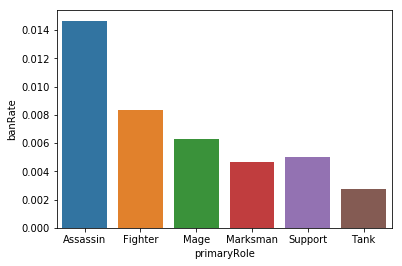

In [8]:
RolesData = ChampionsData.groupby(['primaryRole'])['banRate'].mean()

ax = sns.barplot(x='primaryRole', y="banRate", data=RolesData.to_frame().reset_index())

To test my original hypothesis, I plotted the crowd control score calculated above against banrate. I had thought that there may be a positive correlation here because crowd control limits the player from playing the game, so it would make sense that champions with a lot of it would be disliked. Instead, there is no significant correlation, and in fact a slight negative correlation.

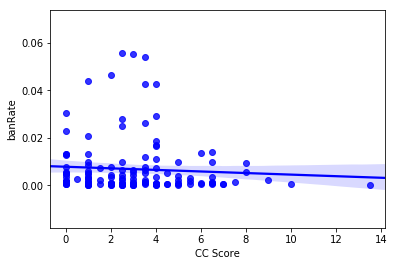

In [9]:
sns.regplot(x='CC Score', y='banRate', data=ChampionsData, color ='blue')

To explain why there might be a slight negative correlation between CC Score and ban rate, I made a graph comparing primary role with CC Score. The graph shows that Tanks and supports have a significantly higher crowd control score on average, but we know from earlier that they have a lower banrate as well. This shows why there is likely a negative correlation between crowd control score and banrate, and suggests that the role of the champion is far more significant than the amount of crowd control in predicting the ban rate.

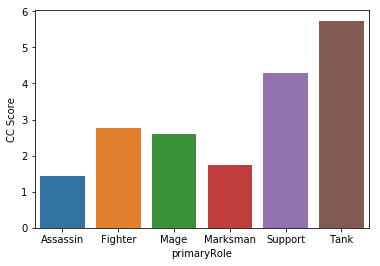

In [10]:
RolesData = ChampionsData.groupby(['primaryRole'])['CC Score'].mean()
ax = sns.barplot(x='primaryRole', y="CC Score", data=RolesData.to_frame().reset_index())

Another test is to look at whether or not ban rate is related to win rate. It would make sense for people to be more likely to ban the champions that are more likely to win, however we can see from this graph there is actually no real correlation between winrate and banrate. 

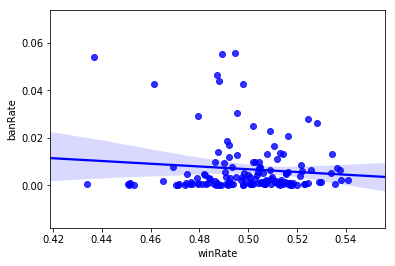

In [11]:
sns.regplot(x='winRate', y='banRate', data=ChampionsData, color ='blue')


Next, I look at the relation between play rate and ban rate. There is a very clear positive correlation, and it makes sense that champions that are played more often end up getting banned more often, since players don't want to waste a ban on a champion that is unlikely to be chosen. 

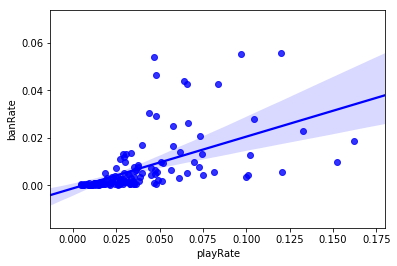

In [12]:
sns.regplot(x='playRate', y='banRate', data=ChampionsData, color ='blue')

Since there is a clear correlation between play rate and ban rate, I will normalize the banrate of champions based on their playrate to see which champions are banned more, relative to their play rate.
Running a least squares regression on the data to produce a model will allow for making a graph of residuals.

In [13]:
import statsmodels.api as sm

x = ChampionsData['playRate']
y = ChampionsData['banRate']

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                banRate   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           4.66e-22
Time:                        18:14:34   Log-Likelihood:                 457.75
No. Observations:                 142   AIC:                            -913.5
Df Residuals:                     141   BIC:                            -910.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
playRate       0.1974      0.017     11.521      0.000       0.164       0.231
==============================================================================
Omnibus:                       91.529   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.259
Skew:                           2.429   Prob(JB):                     3.77e-99
Kurtosis:                      10.280   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here the residuals can be calculated by subtracting the predicted banrate generated by the model from the actual banrate from champion.gg statistics.

In [14]:
predictions = model.predict(x)
predictions
ChampionsData['residual'] = ChampionsData['banRate']-model.predict(ChampionsData['playRate'])
ChampionsData[['name','CC Score','winRate','playRate','banRate','primaryRole','residual']].head(10)

,name,CC Score,winRate,playRate,banRate,primaryRole,residual
key,,,,,,,
266,Aatrox,4.0,0.479462,0.048104,0.029284,Fighter,0.019789
103,Ahri,2.5,0.525860,0.047380,0.006514,Mage,-0.002838
84,Akali,3.5,0.436891,0.047091,0.054260,Assassin,0.044965
12,Alistar,8.0,0.489915,0.051832,0.009477,Tank,-0.000754
32,Amumu,4.5,0.523371,0.025834,0.000788,Tank,-0.004311
34,Anivia,6.0,0.515717,0.014349,0.001111,Mage,-0.001721
1,Annie,2.5,0.503913,0.015189,0.001170,Mage,-0.001828
22,Ashe,3.5,0.522925,0.035557,0.000493,Marksman,-0.006525
136,Aurelion Sol,5.5,0.482597,0.004873,0.000533,Mage,-0.000429


The residual graph shows two things. First, it shows that the linear model does a decent job at matching the data. Because the residuals are randomly distributed above and below the line, it shows that there isn't another relationship happening. The second part that I can observe is the disproportionately banned champions. They will be the champions with the greatest residuals.

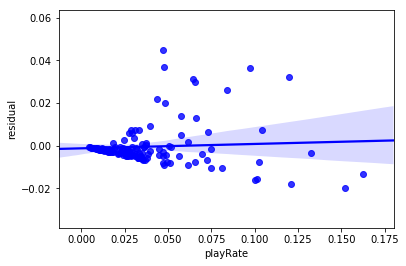

In [15]:
sns.regplot(x='playRate', y='residual', data=ChampionsData, color ='blue')

Next is the list of the top 10 champions that are disproportionately banned based on their playrate. This list is made up of the most disliked champions to play against relative to their play rate. 

In [16]:
ChampionsData.sort_values(['residual'], ascending=False)[['name','residual']].head(10)

,name,residual
key,,
84,Akali,0.044965
122,Darius,0.036957
157,Yasuo,0.036203
518,Neeko,0.032077
238,Zed,0.031394
39,Irelia,0.029877
555,Pyke,0.026257
7,LeBlanc,0.021925
266,Aatrox,0.019789


Next is the list of the bottom 10 champions that are disproportionately not banned based on their playrate. This list is made up of the least disliked champions to play against. Banning these champions will result in a higher chance of banning someone out on the other team, because these champions are likely to be played but unlikely to be banned.

In [17]:
ChampionsData.sort_values(['residual'], ascending=True)[['name','residual']].head(10)

,name,residual
key,,
412,Thresh,-0.020027
81,Ezreal,-0.018124
99,Lux,-0.016119
202,Jhin,-0.015563
64,Lee Sin,-0.013305
67,Vayne,-0.010422
51,Caitlyn,-0.010415
222,Jinx,-0.008856
92,Riven,-0.008843


Conclusion:

Champions in League of Legends are banned for a few reasons. Contrary to our hypothesis, crowd control does not play a factor 
in how frequently a champion is banned, and actually has a slight negative correlation, meaning champions with high crowd control are actually slightly _less_ likely to be banned than champions with high amounts of crowd control. This is because ban rate is more strongly related to the champions role than its crowd control score, and the roles that are more likely to be banned have lower amounts of crowd control.


It also became apparent that play rate has a very strong correlation with ban rate. Champions that are played more are much more likely to be banned. Because of this, we used a linear regression to find the champions that are banned far more or less than would be predicted based on their play rate.